In [27]:
import sys, os
from os.path import join, abspath, dirname, splitext
from astropy.coordinates import Angle, SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import tomlkit
import astropy.units as u
from alora.observatory.astrometry import Astrometry
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D

In [11]:
with open("TESS.toml","rb") as f:
    cfg = tomlkit.load(f)

In [12]:
DATA_PATH = "data"
fitsfiles = [join(DATA_PATH,f) for f in os.listdir(DATA_PATH)]

In [ ]:
ast = Astrometry()
ast.scale = cfg["CAMERA"]["FIELD_WIDTH"]

Could not connect to astrometry server. Will try again when needed.


In [14]:
cutouts = []

In [41]:
with fits.open(fitsfiles[0]) as hdul:
    header = hdul[0].header
    data = hdul[0].data
    wcs = WCS(header)
tl,tr,br,bl = wcs.calc_footprint()*u.deg
w = SkyCoord(*tl).separation(SkyCoord(*tr))
h = SkyCoord(*tl).separation(SkyCoord(*bl))
center = wcs.wcs_pix2world(data.shape[0]/2,data.shape[1]/2,0)
w,h,center

(<Angle 0.10072545 deg>,
 <Angle 0.10098631 deg>,
 [array(52.70141678), array(20.89471392)])

In [42]:
cdata = Cutout2D(data,SkyCoord(*(center*u.deg)),[w,h],wcs=wcs,copy=True)

In [43]:
cdata.data.shape

(1608, 1606)

In [44]:
data.shape

(1608, 1608)

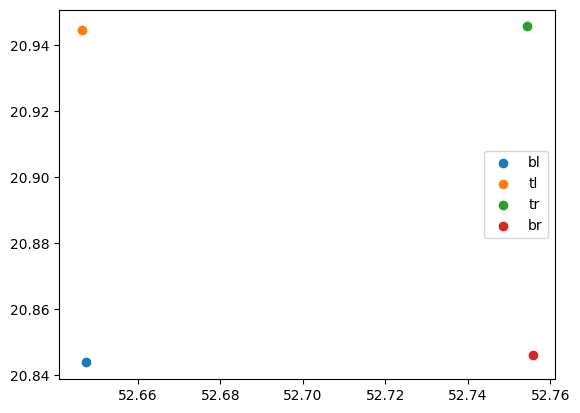

In [45]:
for coord, label in zip([bl,tl,tr,br],["bl","tl","tr","br"]):
    plt.scatter(coord[0],coord[1],label=label)
    plt.legend()

In [47]:
for f in fitsfiles:
    with fits.open(f) as hdul:
        header = hdul[0].header
        data = hdul[0].data
        wcs = WCS(header)
    cutouts.append(Cutout2D(data,SkyCoord(*(center*u.deg)),[w,h],wcs=wcs,copy=True))